In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Memuat data dari file CSV
file_path = 'diabetes.csv'  # Sesuaikan path dengan file yang diunggah
df = pd.read_csv(file_path)

In [2]:
df.head(768)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
print("dimension of diabetes data: {}".format(df.shape))

dimension of diabetes data: (768, 9)


In [4]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

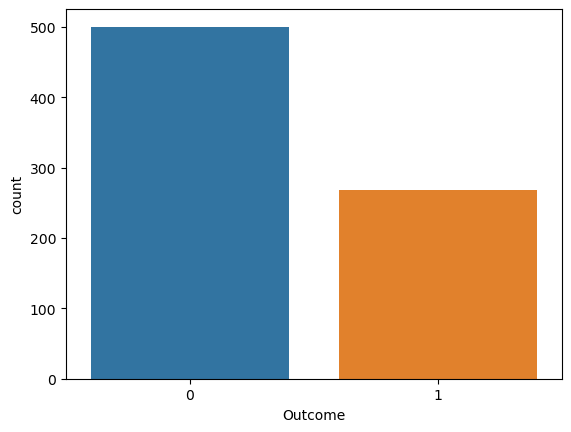

In [5]:
sns.countplot(df['Outcome'],label="Count")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# KNN 

In [7]:
# Memisahkan fitur dan label
X = df.drop(columns='Outcome')
y = df['Outcome']

In [8]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Mencari K yang optimal
param_grid = {'n_neighbors': range(1, 16)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 16)}, scoring='accuracy')

In [11]:
# Menampilkan hasil GridSearch
print("Nilai K terbaik:", grid_search.best_params_)
print("Akurasi terbaik:", grid_search.best_score_)

Nilai K terbaik: {'n_neighbors': 11}
Akurasi terbaik: 0.7606024256963881


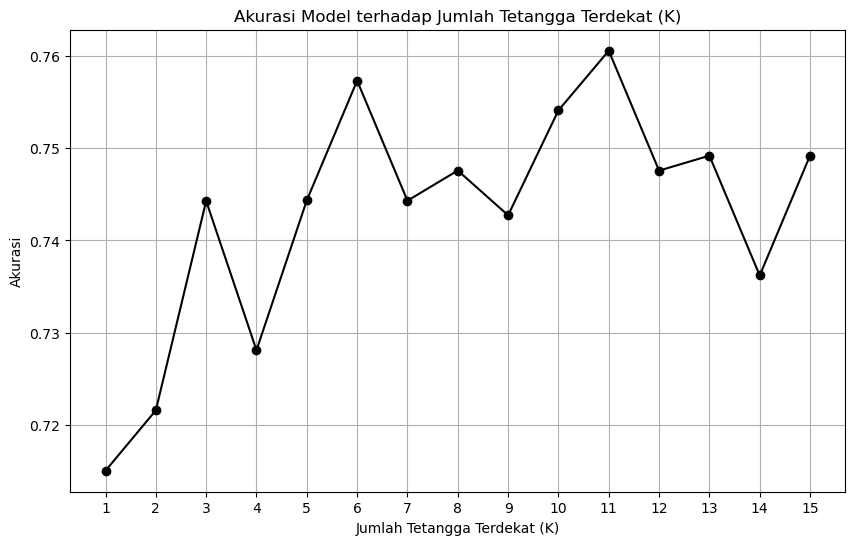

In [12]:
import matplotlib.pyplot as plt

# Ambil nilai-n nilai K yang diuji
k_values = range(1, 16)

# Ambil akurasi validasi silang untuk setiap nilai K
grid_mean_scores = grid_search.cv_results_['mean_test_score']

# Plot akurasi terhadap nilai K
plt.figure(figsize=(10, 6))
plt.plot(k_values, grid_mean_scores, marker='o', color='Black',linestyle='-')
plt.title('Akurasi Model terhadap Jumlah Tetangga Terdekat (K)')
plt.xlabel('Jumlah Tetangga Terdekat (K)')
plt.ylabel('Akurasi')
plt.xticks(k_values)
plt.grid(True)
plt.show()

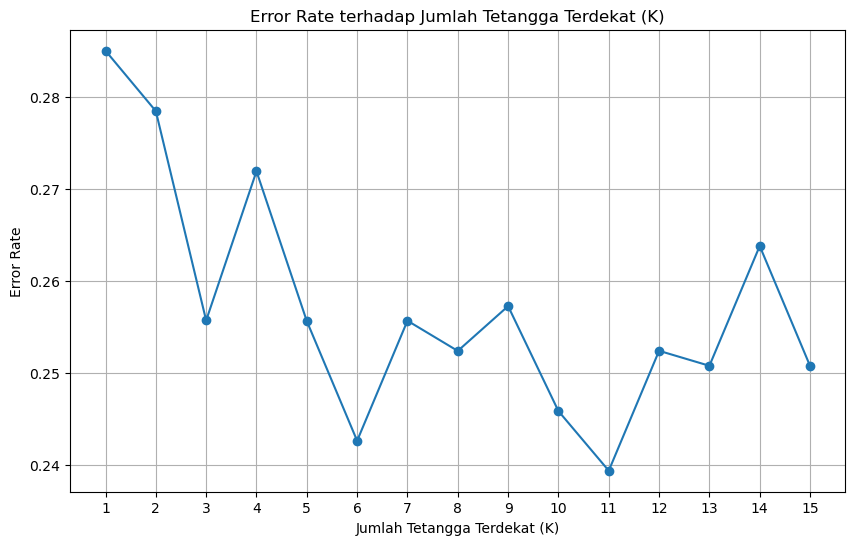

In [13]:
# Ambil nilai-n nilai K yang diuji
k_values = range(1, 16)

# Ambil error rate untuk setiap nilai K
grid_error_rates = [1 - score for score in grid_mean_scores]

# Plot error rate terhadap nilai K
plt.figure(figsize=(10, 6))
plt.plot(k_values, grid_error_rates, marker='o', linestyle='-')
plt.title('Error Rate terhadap Jumlah Tetangga Terdekat (K)')
plt.xlabel('Jumlah Tetangga Terdekat (K)')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [14]:
# Melatih model KNN dengan K terbaik
best_k = grid_search.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [15]:
# Prediksi data uji
y_pred_test = knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
# Prediksi data latih
y_pred_train = knn.predict(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
# Evaluasi model
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

In [18]:
print("Akurasi pada data uji dengan K terbaik:", accuracy_test)
print("Akurasi pada data latih dengan K terbaik:", accuracy_train)

Akurasi pada data uji dengan K terbaik: 0.7077922077922078
Akurasi pada data latih dengan K terbaik: 0.7915309446254072


In [19]:
# Menampilkan data latih dengan prediksi
train_results = pd.DataFrame(X_train, columns=df.columns[:-1])
train_results['Actual'] = y_train.values
train_results['Predicted'] = y_pred_train

In [20]:
print("\nData Training dengan Prediksi:")
print(train_results.head(768))


Data Training dengan Prediksi:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0      -0.526397 -1.151398      -3.752683      -1.322774 -0.701206 -4.135256   
1       1.588046 -0.276643       0.680345       0.233505 -0.701206 -0.489169   
2      -0.828460  0.566871      -1.265862      -0.090720  0.013448 -0.424522   
3      -1.130523  1.254179      -1.049617      -1.322774 -0.701206 -1.303720   
4       0.681856  0.410665       0.572222       1.076490  2.484601  1.838121   
..           ...       ...            ...            ...       ...       ...   
609     0.379793  0.566871      -0.292759       0.946800  0.504235 -0.437451   
610    -0.828460 -0.776503       2.842797      -1.322774 -0.701206 -1.239073   
611     1.890109 -0.620297       0.896590       1.076490 -0.701206  1.760544   
612    -1.130523  0.629354      -3.752683      -1.322774 -0.701206  1.346804   
613    -1.130523  0.129493       1.437203      -1.322774 -0.701206 -1.226144   

     Di

In [21]:
# Menampilkan data uji dengan prediksi
test_results = pd.DataFrame(X_test, columns=df.columns[:-1])
test_results['Actual'] = y_test.values
test_results['Predicted'] = y_pred_test

In [22]:
print("\nData Testing dengan Prediksi:")
print(test_results.head(768))


Data Testing dengan Prediksi:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.681856 -0.714020      -0.617127       0.817110  0.934749  0.260736   
1      -0.526397 -0.276643       0.301916       0.752265 -0.701206  0.480535   
2      -0.526397 -0.401608      -0.292759      -1.322774 -0.701206 -0.153005   
3       1.285983 -0.432849       0.572222      -1.322774 -0.701206 -0.954627   
4       0.983919  0.473147       1.112835      -1.322774 -0.701206 -0.269369   
..           ...       ...            ...            ...       ...       ...   
149     1.588046  1.379144       1.004713      -1.322774 -0.701206 -0.204722   
150    -0.828460 -1.370087      -0.725249       0.622575 -0.219029  0.170230   
151     1.285983 -0.807744       0.139732      -1.322774 -0.701206  0.622758   
152    -0.526397  0.785560       0.031609       1.141335  2.398498 -0.515028   
153     1.285983 -1.463810       0.031609       1.271024 -0.279301  0.428818   

     Dia

In [23]:
from sklearn.metrics import classification_report

# Evaluasi model
print("\nEvaluasi Model:")
print("--------------------------------------------------")

# Evaluasi data uji
print("\nEvaluasi pada Data Uji:")
print(classification_report(y_test, y_pred_test))

# Evaluasi data latih
print("\nEvaluasi pada Data Latih:")
print(classification_report(y_train, y_pred_train))



Evaluasi Model:
--------------------------------------------------

Evaluasi pada Data Uji:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        99
           1       0.60      0.56      0.58        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.71      0.71       154


Evaluasi pada Data Latih:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       401
           1       0.74      0.61      0.67       213

    accuracy                           0.79       614
   macro avg       0.78      0.75      0.76       614
weighted avg       0.79      0.79      0.79       614



In [24]:
# Validasi silang k-fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [25]:
# Menampilkan hasil validasi silang k-fold
print("\nValidasi Silang K-Fold:")
print("--------------------------------------------------")
print("Skor Akurasi pada setiap fold:", cross_val_scores)
print("Rata-rata Akurasi:", cross_val_scores.mean())
print("Standar Deviasi Akurasi:", cross_val_scores.std())


Validasi Silang K-Fold:
--------------------------------------------------
Skor Akurasi pada setiap fold: [0.67532468 0.75324675 0.63636364 0.77922078 0.72727273 0.66233766
 0.74025974 0.74025974 0.72368421 0.80263158]
Rata-rata Akurasi: 0.7240601503759398
Standar Deviasi Akurasi: 0.04947608329623987
